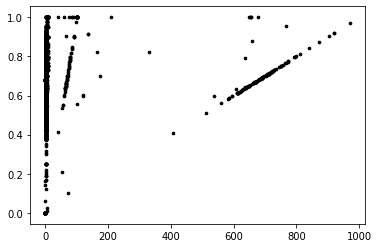

In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data=pd.read_csv('post_cleaning.csv')
g1=data['score'].values
g2=data['normalised_score'].values
Y=np.array(list(zip(g1,g2)))
plt.scatter(g1,g2,c='black',s=7)

In [3]:
# Euclidean Distance Caculator
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [4]:
# Number of clusters
k=2
# X coordinates of random centroids
C_x=np.random.randint(0,np.max(Y)-20,size=k)
# Y coordinates of random centroids
C_y=np.random.randint(0,np.max(Y)-20,size=k)
C=np.array(list(zip(C_x, C_y)),dtype=np.float32)
print(C)

[[542. 182.]
 [731. 208.]]


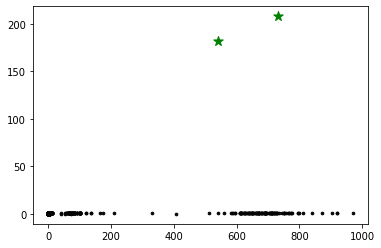

In [5]:
# Plotting along with the Centroids
plt.scatter(g1,g2,c='#050505',s=7)
plt.scatter(C_x,C_y,marker='*',s=100,c='g')

In [6]:
# To store the value of centroids when it updates
C_old=np.zeros(C.shape)
# Cluster Lables(0,1)
clusters=np.zeros(len(Y))
# Error func. - Distance between new centroids and old centroids
error=dist(C,C_old,None)
# Loop will run till the error becomes zero
while error!=0:
    # Assigning each value to its closest cluster
    for i in range(len(Y)):
        distances=dist(Y[i],C)
        cluster=np.argmin(distances)
        clusters[i]=cluster
    # Storing the old centroid values
    C_old=deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points=[Y[j] for j in range(len(Y)) if clusters[j]==i]
        C[i]=np.mean(points,axis=0)
    error=dist(C,C_old,None)

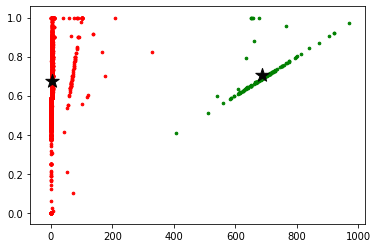

In [7]:
colors=['r','g','b','y','c','m']
fig,ax=plt.subplots()
for i in range(k):
        points = np.array([Y[j] for j in range(len(Y)) if clusters[j]==i])
        ax.scatter(points[:,0],points[:,1], s=7,c=colors[i])
ax.scatter(C[:,0], C[:,1], marker='*',s=200,c='#050505')

In [ ]:
# From this visualization it is clear that there are 2 clusters with black stars as their centroid